In [1]:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.util import *

In [2]:
#Twitter API Credentials
consumerKey = 'XWqbYcAioN9622YTSHGgODe0X'
consumerSecret = '8FDyi2cdMNbGDfvOXeCZKy5iw7CcZ2KnbHHXduonpwGDsgtfPd'
accessToken = '1565925882291621888-TvlGhC7yLu1siKu02RMmYhMVMU8vF6'
accessTokenSecret = 'obCyAaINCtdUPGVxAkel8vv75IECKs04kA2SzgiEFNC13'

In [3]:
#create  the authentication object
authenticate = tweepy.OAuthHandler(consumerKey , consumerSecret )

#set the access token 
authenticate.set_access_token(accessToken , accessTokenSecret)

#Creating api object
api = tweepy.API(authenticate , wait_on_rate_limit = True)

In [5]:
while True:
  keyword = input("Enter the keyword or hashtag to search:")
  noOfTweet = int(input("How many tweets do you want to search:"))
  
  res_keyword = re.sub(' +', '', keyword)
  if res_keyword == "":
    print("Invalid keyword")
    continue

  tweets = tweepy.Cursor(api.search , q=res_keyword).items(noOfTweet)
  tweet_list = []

  for tweet in tweets:
    tweet_list.append(tweet.text)
  break  
  

Enter the keyword or hashtag to search:corona
How many tweets do you want to search:10


AttributeError: ignored

In [ ]:
tweet_list

['Hemant Soren Amba Prasad Deepak prakash Bjp CMO alamgir alam mahi https://t.co/bWZhB7kvip https://t.co/HsbQ2wd0LP',
 'RT @yusufsyedb: இப்பத்தான் புரியுது BJP க்கு ஆதரவாக பதிவுகள் போடுபவர்கள் கூலிக்கு மாரடிக்கும் கூட்டம் என்று. இதெல்லாம் ஒரு பொழப்பா ....\n\nக…',
 'RT @duhanofficial_: Hindu Stupidity 101.\n\nYou should also do small things like boycotting Jihadi movies to hurt them financially.\n\nBut the…',
 'RT @news24tvchannel: "BJP रोज नए नए सब्जबाग दिखाकर जुमले पड़ती है, असल मुद्दों से ध्यान हटाती है, करना इसे कुछ भी नहीं है, BJP-RSS हमेशा द…',
 'RT @mysatish19: सिरसी, कर्नाटक के पवित्र शहस्त्रलिंगम पर ये दंपती चिकन बिरयानी खा रहे है\n\nइन्हें गिरफ्तार करने के मांग करें, तो बाढ़ आ जाए…',
 'RT @JPNadda: Glimpses from my visit to Karnataka. The state with its majestic tapestry of beautiful landscapes &amp; rich history wins over my…',
 'RT @BefittingFacts: Himachal Pradesh:\n\nBJP had reduced VAT on Diesel.\n\nNewly elected Congress govt increased VAT on Diesel by ₹3/litre.\n\nGi…',

In [ ]:
#Cleaning
tweet_list = pd.DataFrame(tweet_list)

#removing duplicate tweets
tweet_list.drop_duplicates(inplace = True)

tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]

#Removing RT, Punctuation , emoticons etc
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
emoj = lambda x : re.sub(emoji_pattern , ""  , x)
remove_rt = lambda x: re.sub('RT @\w+: ' , " ", x)
rt = lambda x: re.sub("(@[A-Za-z0–9_]+)|(^[0-9A-Za-z \t])|(\w+:\/\/\S+)" , " " , x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt).map(emoj)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)  

,0,text
0,Hemant Soren Amba Prasad Deepak prakash Bjp CM...,emant soren amba prasad deepak prakash bjp cm...
1,RT @yusufsyedb: இப்பத்தான் புரியுது BJP க்கு ஆ...,இப்பத்தான் புரியுது bjp க்கு ஆதரவாக பதிவுகள் ...
2,RT @duhanofficial_: Hindu Stupidity 101.\n\nYo...,hindu stupidity 101.\n\nyou should also do sm...
3,"RT @news24tvchannel: ""BJP रोज नए नए सब्जबाग दि...","""bjp रोज नए नए सब्जबाग दिखाकर जुमले पड़ती है,..."
4,"RT @mysatish19: सिरसी, कर्नाटक के पवित्र शहस्त...","सिरसी, कर्नाटक के पवित्र शहस्त्रलिंगम पर ये द..."
5,RT @JPNadda: Glimpses from my visit to Karnata...,glimpses from my visit to karnataka. the stat...
6,RT @BefittingFacts: Himachal Pradesh:\n\nBJP h...,himachal pradesh:\n\nbjp had reduced vat on d...
7,@ssbhabhor @kuberdindor @bachubhaikhabad @KBKi...,…
8,RT @NewsArenaIndia: Tripura BJP Govt launched ...,tripura bjp govt launched special educational...
9,RT @Rajasthan_PYC: बदल रहा है माहौल....❤️‍🔥\n\...,बदल रहा है माहौल....\n\nराहुल गांधी और भारत ज...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'    

tw_list['polarity'] = tw_list['text'].apply(getPolarity)
tw_list['subjectivity'] = tw_list['text'].apply(getSubjectivity)
tw_list['sentiment'] = tw_list['polarity'].apply(getSentiment)

tw_list

,0,text,polarity,subjectivity,sentiment
0,Hemant Soren Amba Prasad Deepak prakash Bjp CM...,emant soren amba prasad deepak prakash bjp cm...,0.000000,0.000000,Neutral
1,RT @yusufsyedb: இப்பத்தான் புரியுது BJP க்கு ஆ...,இப்பத்தான் புரியுது bjp க்கு ஆதரவாக பதிவுகள் ...,0.000000,0.000000,Neutral
2,RT @duhanofficial_: Hindu Stupidity 101.\n\nYo...,hindu stupidity 101.\n\nyou should also do sm...,-0.283333,0.466667,Negative
3,"RT @news24tvchannel: ""BJP रोज नए नए सब्जबाग दि...","""bjp रोज नए नए सब्जबाग दिखाकर जुमले पड़ती है,...",0.000000,0.000000,Neutral
4,"RT @mysatish19: सिरसी, कर्नाटक के पवित्र शहस्त...","सिरसी, कर्नाटक के पवित्र शहस्त्रलिंगम पर ये द...",0.000000,0.000000,Neutral
5,RT @JPNadda: Glimpses from my visit to Karnata...,glimpses from my visit to karnataka. the stat...,0.508333,0.650000,Positive
6,RT @BefittingFacts: Himachal Pradesh:\n\nBJP h...,himachal pradesh:\n\nbjp had reduced vat on d...,0.136364,0.454545,Positive
7,@ssbhabhor @kuberdindor @bachubhaikhabad @KBKi...,…,0.000000,0.000000,Neutral
8,RT @NewsArenaIndia: Tripura BJP Govt launched ...,tripura bjp govt launched special educational...,0.303571,0.410714,Positive
9,RT @Rajasthan_PYC: बदल रहा है माहौल....❤️‍🔥\n\...,बदल रहा है माहौल....\n\nराहुल गांधी और भारत ज...,0.000000,0.000000,Neutral


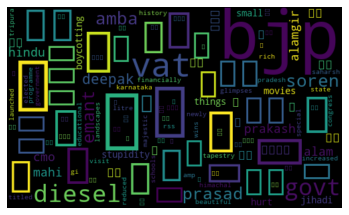

In [ ]:
#creating a word cloud
allWords = ' '.join([twts for twts in tw_list['text']])
wordCloud = WordCloud(width = 500 , height = 300 , random_state=21 , max_font_size=119).generate(allWords)

plt.imshow(wordCloud , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
Neutral,6,60.0
Positive,3,30.0
Negative,1,10.0


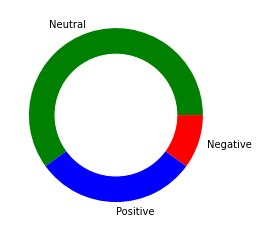

In [ ]:
# create data for Pie Chart
piechart = count_values_in_column(tw_list,"sentiment")
names= piechart.index
size=piechart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()